## Initial Setup

In [2]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [3]:
# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# setting default number of rows and columns to be displayed
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_colwidth', None)  # No limit on column width

In [5]:
# number formatting for better readability

nf_0 = lambda x: f'{x:,.0f}' if isinstance(x, (int, float)) else x # rounding-off to 0 decimals with thousand separator (for integers)
nf_2 = lambda x: f'{x:,.2f}' if isinstance(x, (int, float)) else x # rounding-off to 2 decimals with thousand separator (for floats)
nf_2np = lambda x: f'{x:.2%}' if isinstance(x, (int, float)) else x # rounding-off to 2 decimals with percent sign, assuming the number is calculated as percentage and not displayed as percentage
nf_2pp = lambda x: f'{x/100:.2%}' if isinstance(x, (int, float)) else x # rounding-off to 2 decimals with percent sign, assuming the number is displayed as percentage but without percentage sign

In [6]:
# adjusting CSS for the Jupyter Notebook, to avoid text-wrapping
from IPython.display import display, HTML

display(HTML("<style>.dataframe td { white-space: nowrap; }</style>"))

### Dataset

In [7]:

# importing dataset from github into pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/kalakhushi18/Advance-Time-Series-Prediction-W24/refs/heads/hassan/1_DatasetCharacteristics/cleaned_data.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3655 entries, 0 to 3654
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         3655 non-null   object 
 1   bitcoin_closing_prices       3655 non-null   float64
 2   sp500_closing_data           3655 non-null   float64
 3   inflation_rate               3655 non-null   float64
 4   daily_treasury_rates         3655 non-null   float64
 5   bitcoin_daily_google_trends  3655 non-null   int64  
 6   is_holiday                   3655 non-null   int64  
 7   twitter_sentiments_score     0 non-null      float64
dtypes: float64(5), int64(2), object(1)
memory usage: 228.6+ KB


In [9]:
# changing 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# sorting the dataframe by date
df = df.sort_values(by='date')

df.head()

,date,bitcoin_closing_prices,sp500_closing_data,inflation_rate,daily_treasury_rates,bitcoin_daily_google_trends,is_holiday,twitter_sentiments_score
0,2014-11-01,325.748993,2017.810059,1.93,0.03,40,1,NaN
1,2014-11-02,325.891998,2017.810059,1.93,0.03,44,1,NaN
2,2014-11-03,327.553986,2017.810059,1.93,0.03,46,0,NaN
3,2014-11-04,330.492004,2012.099976,1.92,0.04,43,0,NaN
4,2014-11-05,339.485992,2023.569946,1.93,0.04,45,0,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3655 entries, 0 to 3654
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         3655 non-null   datetime64[ns]
 1   bitcoin_closing_prices       3655 non-null   float64       
 2   sp500_closing_data           3655 non-null   float64       
 3   inflation_rate               3655 non-null   float64       
 4   daily_treasury_rates         3655 non-null   float64       
 5   bitcoin_daily_google_trends  3655 non-null   int64         
 6   is_holiday                   3655 non-null   int64         
 7   twitter_sentiments_score     0 non-null      float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 228.6 KB


In [11]:
# extract 'day_of_week' from 'date' column
df['day_of_week'] = df['date'].dt.dayofweek

# we will not be extracting 'day_of_month' from 'date' column because it is not always 31st after the 30th day of the month.

# extract 'day_of_year' from 'date' column
df['day_of_year'] = df['date'].dt.dayofyear

# extract 'month_of_year' from 'date' column
df['month_of_year'] = df['date'].dt.month

# extract 'year' from 'date' column
df['year'] = df['date'].dt.year


In [12]:
# setting 'date' column as index
df.set_index('date', inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3655 entries, 2014-11-01 to 2024-11-02
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   bitcoin_closing_prices       3655 non-null   float64
 1   sp500_closing_data           3655 non-null   float64
 2   inflation_rate               3655 non-null   float64
 3   daily_treasury_rates         3655 non-null   float64
 4   bitcoin_daily_google_trends  3655 non-null   int64  
 5   is_holiday                   3655 non-null   int64  
 6   twitter_sentiments_score     0 non-null      float64
 7   day_of_week                  3655 non-null   int32  
 8   day_of_year                  3655 non-null   int32  
 9   month_of_year                3655 non-null   int32  
 10  year                         3655 non-null   int32  
dtypes: float64(5), int32(4), int64(2)
memory usage: 285.5 KB


In [14]:
df.head()

,bitcoin_closing_prices,sp500_closing_data,inflation_rate,daily_treasury_rates,bitcoin_daily_google_trends,is_holiday,twitter_sentiments_score,day_of_week,day_of_year,month_of_year,year
date,,,,,,,,,,,
2014-11-01,325.748993,2017.810059,1.93,0.03,40,1,NaN,5,305,11,2014
2014-11-02,325.891998,2017.810059,1.93,0.03,44,1,NaN,6,306,11,2014
2014-11-03,327.553986,2017.810059,1.93,0.03,46,0,NaN,0,307,11,2014
2014-11-04,330.492004,2012.099976,1.92,0.04,43,0,NaN,1,308,11,2014
2014-11-05,339.485992,2023.569946,1.93,0.04,45,0,NaN,2,309,11,2014


In [15]:
df.columns

Index(['bitcoin_closing_prices', 'sp500_closing_data', 'inflation_rate',
       'daily_treasury_rates', 'bitcoin_daily_google_trends', 'is_holiday',
       'twitter_sentiments_score', 'day_of_week', 'day_of_year',
       'month_of_year', 'year'],
      dtype='object')

In [16]:
# Cyclic transformation for day_of_week
df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

# No transformation for day_of_month

# Cyclic transformation for day_of_year
df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)

# Cyclic transformation for month
df['month_of_year_sin'] = np.sin(2 * np.pi * df['month_of_year'] / 12)
df['month_of_year_cos'] = np.cos(2 * np.pi * df['month_of_year'] / 12)

# No transformation for year

# Output the transformed DataFrame
df.head()

,bitcoin_closing_prices,sp500_closing_data,inflation_rate,daily_treasury_rates,bitcoin_daily_google_trends,is_holiday,twitter_sentiments_score,day_of_week,day_of_year,month_of_year,year,day_of_week_sin,day_of_week_cos,day_of_year_sin,day_of_year_cos,month_of_year_sin,month_of_year_cos
date,,,,,,,,,,,,,,,,,
2014-11-01,325.748993,2017.810059,1.93,0.03,40,1,NaN,5,305,11,2014,-0.974928,-0.222521,-0.858764,0.512371,-0.5,0.866025
2014-11-02,325.891998,2017.810059,1.93,0.03,44,1,NaN,6,306,11,2014,-0.781831,0.623490,-0.849817,0.527078,-0.5,0.866025
2014-11-03,327.553986,2017.810059,1.93,0.03,46,0,NaN,0,307,11,2014,0.000000,1.000000,-0.840618,0.541628,-0.5,0.866025
2014-11-04,330.492004,2012.099976,1.92,0.04,43,0,NaN,1,308,11,2014,0.781831,0.623490,-0.831171,0.556017,-0.5,0.866025
2014-11-05,339.485992,2023.569946,1.93,0.04,45,0,NaN,2,309,11,2014,0.974928,-0.222521,-0.821477,0.570242,-0.5,0.866025


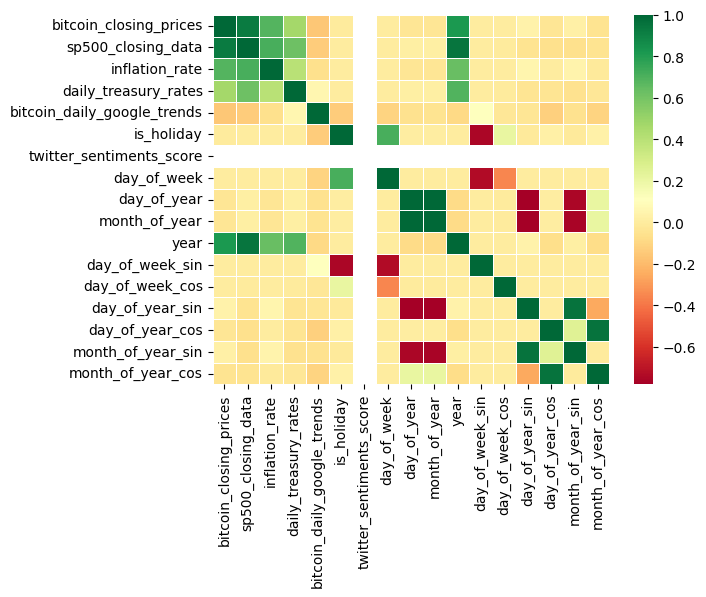

In [17]:
# sns corr plot
corr = df.corr()
sns.heatmap(corr, cmap='RdYlGn', linewidths=0.5)
plt.show()

| Variable                  | Suggested Transformation       | Reason                                                                                                       | Code for Transformation                  |
|---------------------------|--------------------------------|--------------------------------------------------------------------------------------------------------------|------------------------------------------|
| **Bitcoin Closing Price** | Box-Cox Transformation         | Stabilizes variance and makes data more normally distributed, useful for price prediction.                    | `data['Bitcoin_Close_Box'], lmbda = stats.boxcox(data['Bitcoin_Close'])` |
| **S&P 500 Closing Data**  | Log Transformation             | Reduces skewness and stabilizes variance, ideal for high variability in financial data.                      | `data['SP500_Log'] = np.log(data['SP500_Closing'] + 1)` |
| **Inflation Rate**        | Box-Cox Transformation         | Stabilizes variance in data with potential outliers; Box-Cox is tunable with lambda.                         | `data['Inflation_Box'], lmbda = stats.boxcox(data['Inflation'] + 1)` |
| **Daily Treasury Rates**  | Square Root Transformation     | Reduces moderate skew; smooths variability without drastically changing small values.                        | `data['Treasury_Rates_Sqrt'] = np.sqrt(data['Treasury_Rates'])` |
| **Bitcoin Google Trends** | Log Transformation             | Smooths large spikes in highly variable trend data by reducing skewness.                                     | `data['Trends_Log'] = np.log(data['Google_Trends'] + 1)` |
| **Twitter Sentiment Score** | Min-Max Scaling              | Standardizes the range (e.g., 0 to 1) without changing distribution; scores are already range-bound.         | `data['Sentiment_Scaled'] = (data['Sentiment'] - data['Sentiment'].min()) / (data['Sentiment'].max() - data['Sentiment'].min())` |
| **Day Number (day_num)**  | Cyclic Encoding (Sine and Cosine) | Captures weekly cycle, where Sunday (7) and Monday (1) are adjacent; both sine and cosine are needed for full cyclic representation. | `data['day_num_sin'] = np.sin(2 * np.pi * data['day_num'] / 7)` <br> `data['day_num_cos'] = np.cos(2 * np.pi * data['day_num'] / 7)` |
| **Month**                 | One-Hot or Cyclic Encoding     | Useful for capturing month-to-month continuity (e.g., December to January); cyclic encoding is helpful if seasonality is expected. | **One-Hot**: `pd.get_dummies(data['month'], prefix='month')` <br> **Cyclic**: `data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)` <br> `data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)` |
| **Week Number (week_num)**| No transformation or Cyclic Encoding | Represents the yearly cycle; useful for capturing weekly seasonality over a year if encoded cyclically.      | `data['week_num_sin'] = np.sin(2 * np.pi * data['week_num'] / 52)` <br> `data['week_num_cos'] = np.cos(2 * np.pi * data['week_num'] / 52)` |
| **Year**                  | No transformation              | Retain as-is to represent an overall trend over time; SARIMAX can capture trends directly.                   | No transformation needed                 |
| **is_holiday**            | No transformation              | Binary variable (1/0), already suitable for modeling as a dummy variable.                                    | No transformation needed                 |
